In [1]:
include("load_save.jl")
dataset_name = String(split(split(@__FILE__, '\\')[end], '.')[1])
R, X, Y, L, F, Y, PY = load_big_dataset(dataset_name);

Dataset : GB1p_F


Sample : 149361
Variable : 4


In [2]:
using Pandas, Seaborn

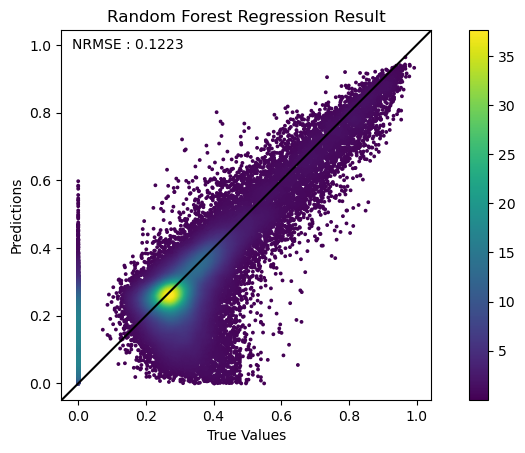

NRMSE : 0.122272


In [3]:
view_result(PY, Y, data_state);

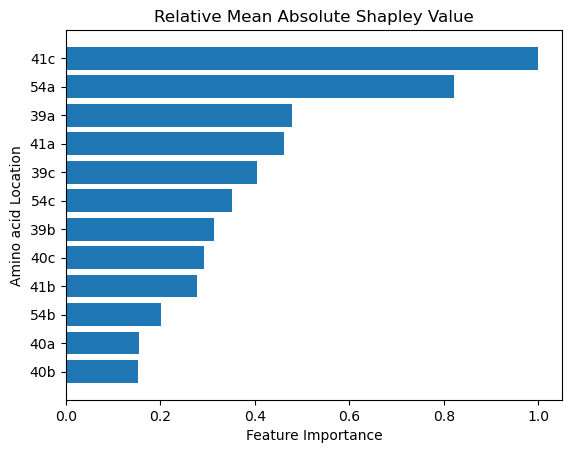

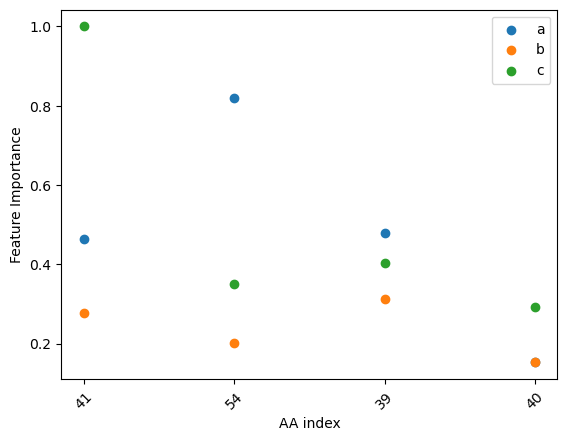

In [4]:
view_importance(R, L, F);

In [5]:
tag = Vector{String}()
NL = Vector{String}()
ind = [4:6; 1:3; 7:12]
for l in L
    nl = parse(Int, l[1:end-1])
    if nl ∈ [3, 5, 7, 9, 20, 26, 30, 34, 39, 41, 52, 54]
        push!(tag, "Core position")
        push!(NL, "*" * l)
    else
        push!(tag, "Remains")
        push!(NL, l)
    end
end
data = Pandas.DataFrame(Dict("Feature Importance" => F[ind], "AA type" => tag[ind]));

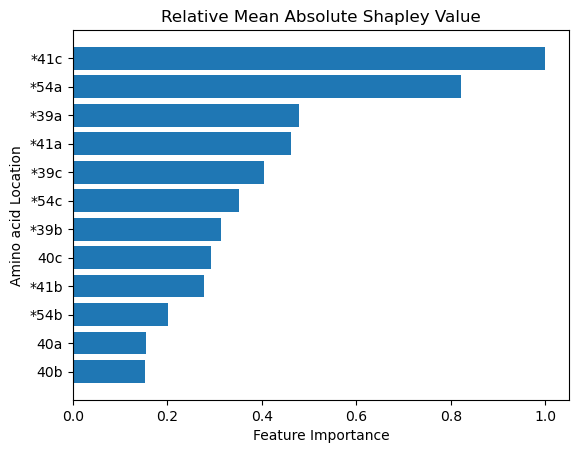

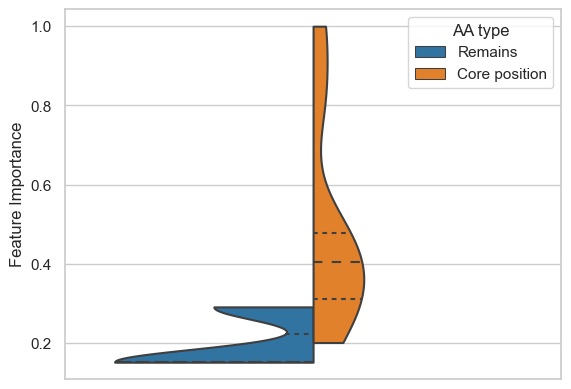

In [6]:
view_importance(R, NL, F, show_number=30)
data["all"] = ""
set_theme(style="whitegrid", palette="tab10")
violinplot(x="all", y="Feature Importance", hue="AA type", inner="quartile", data=data, split=true, bw=0.4, cut=0)
xlabel("")
display(gcf())
close("all")